# Housing Price Prediction: Advanced Regression

# Data Preprocessing

Import train and test data, then combine into a single dataframe to begin preprocessing.

In [1]:
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test_index = test['Id']
price = train['SalePrice']
df = train.drop(["SalePrice"], axis=1).append(test, ignore_index=True, sort=True)

## Dealing with Missing Values

drop columns with over 60% of values missing and print the remaining columns with missing values

In [2]:
import numpy as np

df = df.replace([' ','NULL'], np.nan).dropna(thresh=df.shape[0]*.6, how='all', axis=1)
null_val = df.isnull().sum()
print(null_val[null_val > 0])
print(f"Columns with missing values: {len(null_val)}")

BsmtCond         82
BsmtExposure     82
BsmtFinSF1        1
BsmtFinSF2        1
BsmtFinType1     79
BsmtFinType2     80
BsmtFullBath      2
BsmtHalfBath      2
BsmtQual         81
BsmtUnfSF         1
Electrical        1
Exterior1st       1
Exterior2nd       1
Functional        2
GarageArea        1
GarageCars        1
GarageCond      159
GarageFinish    159
GarageQual      159
GarageType      157
GarageYrBlt     159
KitchenQual       1
LotFrontage     486
MSZoning          4
MasVnrArea       23
MasVnrType       24
SaleType          1
TotalBsmtSF       1
Utilities         2
dtype: int64
Columns with missing values: 75


There are a multitude of missing values across basement columns. The easy way to deal with these columns would be to simply impute missing values with some measure of central tendency for the column (i.e. mean, median). However, there are probably more intuitive way to deduce the missing values of basement columns. To get a picture of what's happenning, let's extract all rows that contain missing basement values. 

In [3]:
bsmt = df[["BsmtCond","BsmtExposure","BsmtFinSF1","BsmtFinSF2","BsmtFinType1",
           "BsmtFinType2","BsmtFullBath","BsmtHalfBath","BsmtQual","BsmtUnfSF","TotalBsmtSF"]]
null_bsmt = bsmt[bsmt.isnull().any(axis=1)]
null_bsmt.head(5)

,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,TotalBsmtSF
17,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
39,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
90,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
102,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
156,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0


It looks like most basements with missing values don't exist, let's drop all rows with a total basement square footage of 0. Let's try the same with the Garage. For the rest, drop if all columns are nan, otherwise impute missing values based on mean or mode. 

In [4]:
df = df[df.TotalBsmtSF != 0]
df = df[df.GarageArea != 0]
df['LotFrontage'] = df['LotFrontage'].fillna(0)

mean_col = ["BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","GarageArea","MasVnrArea","TotalBsmtSF"]
for col in mean_col:
    df[col] = df[col].fillna((df[col].mean()))

df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

## Visualizations

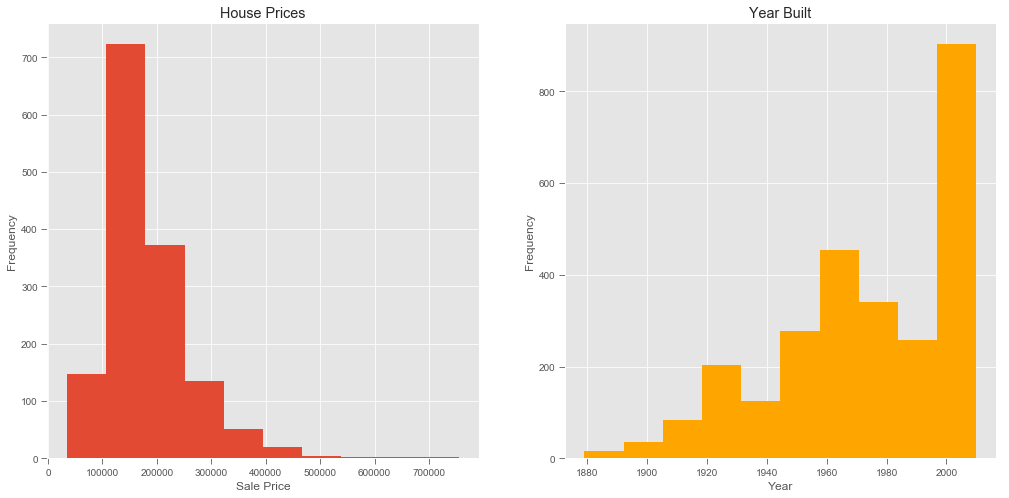

Minimum Sale Price: 34900, Maximum Sale Price: 755000, Average Price: 180921.2


In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use("ggplot")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17,8))
ax0, ax1 = axes.flatten()
n_bins = 10

ax0.hist(price, n_bins, histtype='bar')
ax0.set_title('House Prices')
ax0.set_xlabel('Sale Price')
ax0.set_ylabel('Frequency')

ax1.hist(df['YearBuilt'], n_bins, color='orange')
ax1.set_title('Year Built')
ax1.set_xlabel('Year')
ax1.set_ylabel('Frequency')

plt.show()

print(f"Minimum Sale Price: {price.min()}, Maximum Sale Price: {price.max()}, Average Price: {round(price.mean(), 2)}")